<a href="https://colab.research.google.com/github/Suhas-S63/Machine_Learning_Lab_T1/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Amazon Customer Behavior Survey.csv')
df

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,2023/06/12 4:02:02 PM GMT+5:30,23,Female,Once a week,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,4,...,Sometimes,Yes,Moderately,Sometimes,3,Sometimes,3,4,Competitive prices,Customer service responsiveness
598,2023/06/12 4:02:53 PM GMT+5:30,23,Female,Once a week,Clothing and Fashion,Sometimes,Few times a week,Filter,Multiple pages,3,...,Sometimes,Yes,Heavily,Sometimes,3,Sometimes,3,3,Product recommendations,Reducing packaging waste
599,2023/06/12 4:03:59 PM GMT+5:30,23,Female,Once a month,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,3,...,Sometimes,Yes,Occasionally,Sometimes,3,Sometimes,2,3,Wide product selection,Product quality and accuracy
600,2023/06/12 9:57:20 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,Yes,Few times a month,Keyword,Multiple pages,1,...,Sometimes,No,Heavily,Yes,2,Yes,2,2,Wide product selection,Product quality and accuracy


In [ ]:
df.isnull().sum()

Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     2
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas               

In [ ]:
df['Product_Search_Method'].fillna('Keyword', inplace=True)
df.isnull().sum()

Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     0
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas               

In [ ]:
# Define age bins and labels
age_bins = [18, 26, 36, 46, float('inf')]
age_labels = ['18-25', '26-35', '36-45', '46+']

# Create a new 'Age Group' column based on age binning
df['Age Group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)


In [ ]:
# Display the first few rows of the DataFrame to check the 'Age Group' column
print(df.head())

                        Timestamp  age  Purchase_Frequency  \
0  2023/06/04 1:28:19 PM GMT+5:30   23                   0   
1  2023/06/04 2:30:44 PM GMT+5:30   23                   3   
2  2023/06/04 5:04:56 PM GMT+5:30   24                   0   
3  2023/06/04 5:13:00 PM GMT+5:30   24                   3   
4  2023/06/04 5:28:06 PM GMT+5:30   22                   1   

                                 Purchase_Categories  \
0                           Beauty and Personal Care   
1                               Clothing and Fashion   
2    Groceries and Gourmet Food;Clothing and Fashion   
3  Beauty and Personal Care;Clothing and Fashion;...   
4      Beauty and Personal Care;Clothing and Fashion   

  Personalized_Recommendation_Frequency Browsing_Frequency  \
0                                   Yes   Few times a week   
1                                   Yes  Few times a month   
2                                    No  Few times a month   
3                             Sometimes  F

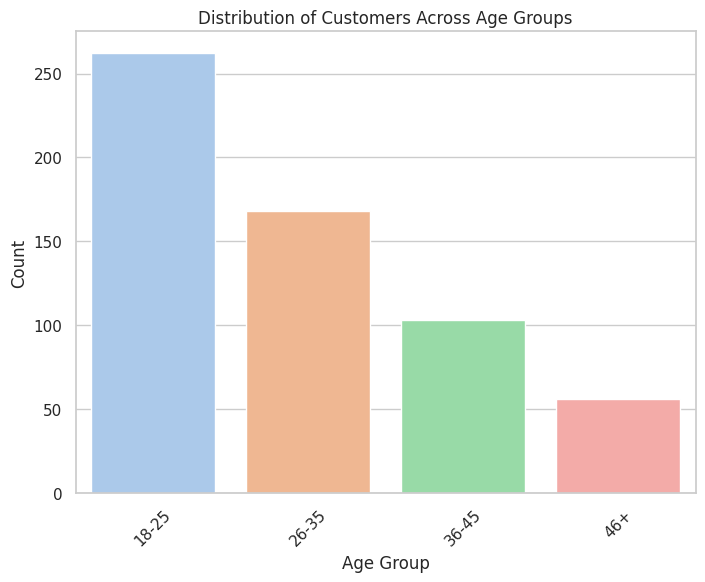

In [ ]:
# Set the style of the Seaborn plot
sns.set(style="whitegrid")
# Create a figure with a specific size
plt.figure(figsize=(8, 6))
# Create a countplot to visualize the distribution of customers across age groups
sns.countplot(data=df, x='Age Group', palette='pastel')
plt.title("Distribution of Customers Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Count")
# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
# Display the plot
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Gender_encoded'] = label_encoder.fit_transform(df['Gender'])
df['Purchase_Frequency_encoded'] = label_encoder.fit_transform(df['Purchase_Frequency'])

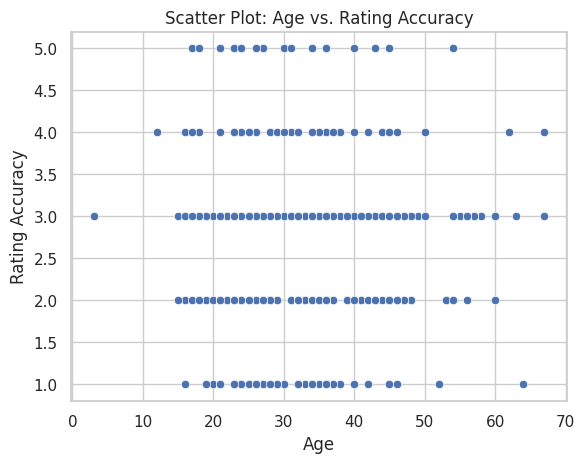

In [ ]:
sns.scatterplot(x='age', y='Rating_Accuracy ', data=df)

# Adding a title to the plot
plt.title("Scatter Plot: Age vs. Rating Accuracy")

# Labeling the x and y axes
plt.xlabel("Age")
plt.ylabel("Rating Accuracy")

# Displaying the plot
plt.show()

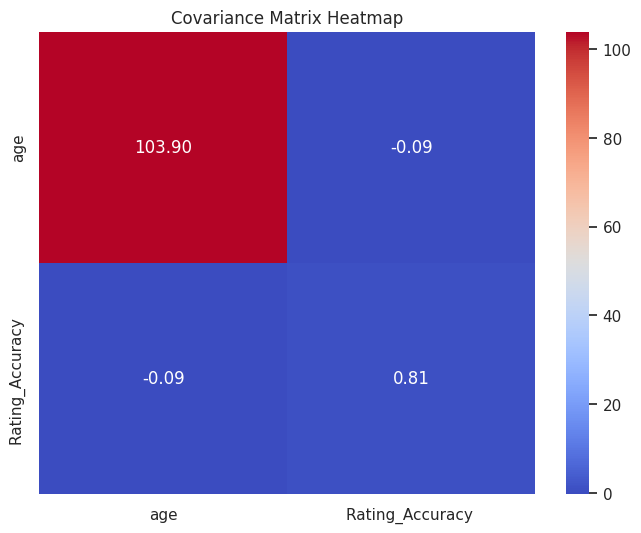

In [ ]:
# Calculate the covariance matrix
covariance_matrix = df[['age', 'Rating_Accuracy ']].cov()

# Create a heatmap for the covariance matrix
plt.figure(figsize=(8, 6))
sns.heatmap(covariance_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            xticklabels=['age', 'Rating_Accuracy '], yticklabels=['age', 'Rating_Accuracy '])
plt.title("Covariance Matrix Heatmap")
plt.show()


In [ ]:
# Independent Two-Sample T-Test for Gender and Rating_Accuracy
male_rating = df[df['Gender'] == 'Male']['Rating_Accuracy ']
female_rating = df[df['Gender'] == 'Female']['Rating_Accuracy ']

t_statistic, p_value = stats.ttest_ind(male_rating, female_rating)

alpha = 0.05

if p_value < alpha:
    print("There is a significant difference in Rating_Accuracy between Male and Female groups.")
else:
    print("There is no significant difference in Rating_Accuracy between Male and Female groups.")
print("T-statistic:", t_statistic)


There is no significant difference in Rating_Accuracy between Male and Female groups.
T-statistic: -0.9886090991636873


In [ ]:
# Independent Two-Sample T-Test for Purchase Frequency and Rating_Accuracy
frequent_purchase_rating = df[df['Purchase_Frequency'] == 1]['Rating_Accuracy ']
not_frequent_purchase_rating = df[df['Purchase_Frequency'] == 0]['Rating_Accuracy ']

t_statistic, p_value = stats.ttest_ind(frequent_purchase_rating, not_frequent_purchase_rating)

alpha = 0.05

if p_value < alpha:
    print("There is a significant difference in Rating_Accuracy between Frequent and Not Frequent purchase groups.")
else:
    print("There is no significant difference in Rating_Accuracy between Frequent and Not Frequent purchase groups.")
print("T-statistic:", t_statistic)


There is no significant difference in Rating_Accuracy between Frequent and Not Frequent purchase groups.
T-statistic: nan


P-value: 0.0007025216973103722
Covariance Matrix:
            age
age  103.902875


<ipython-input-54-7930bbb76bc4>:14: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covariance_matrix = df[['age', 'Purchase_Categories']].cov()
<ipython-input-54-7930bbb76bc4>:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), annot=True, fmt='.1g')


<Axes: >

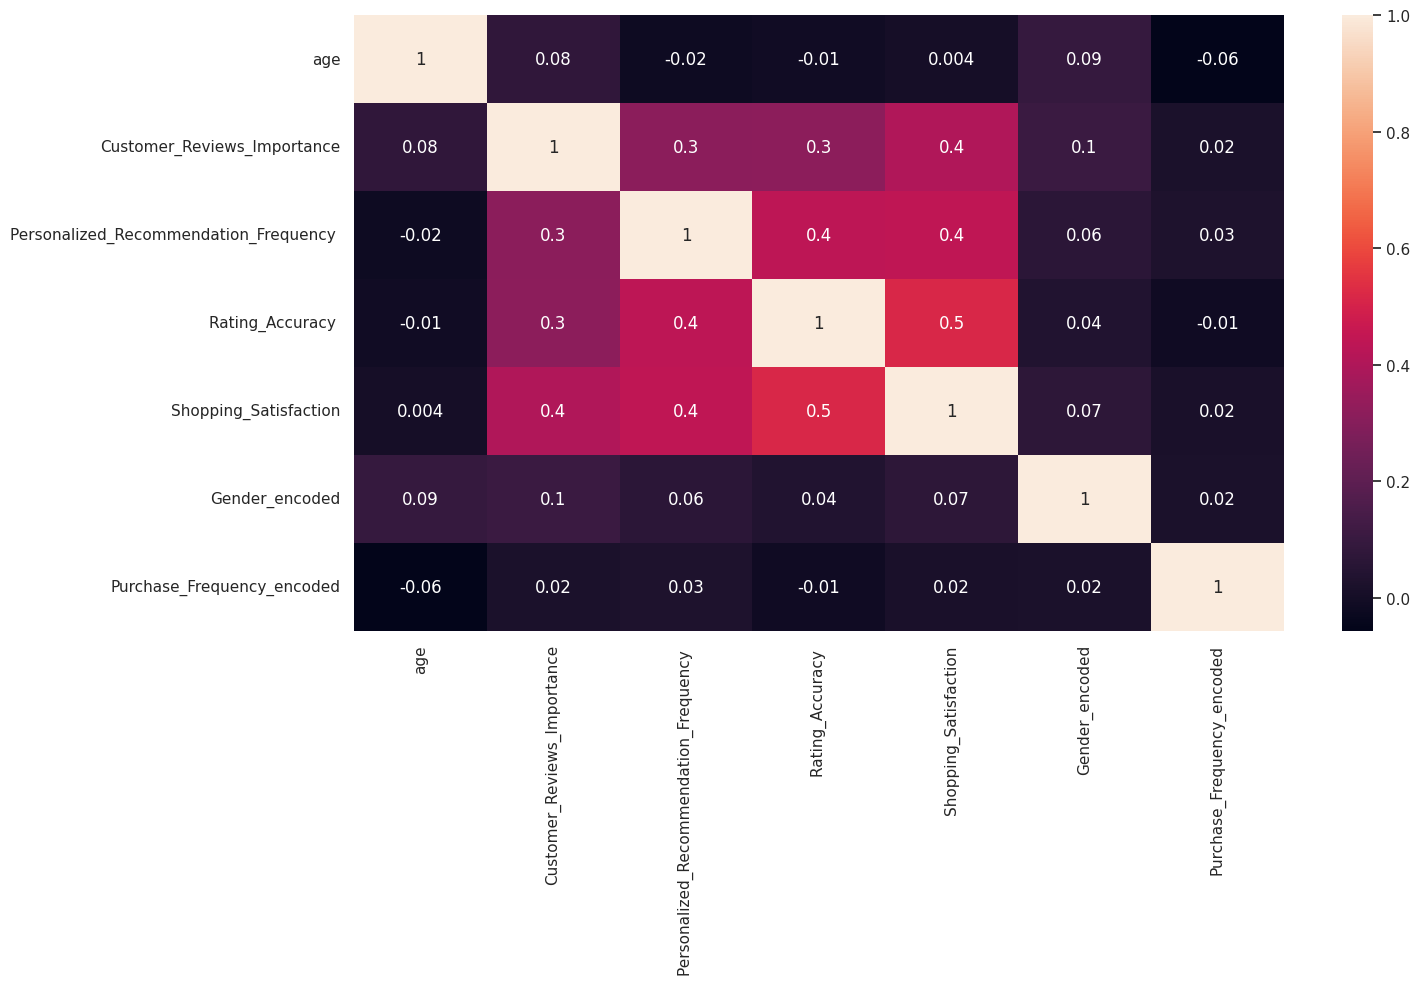

In [ ]:
from scipy.stats import ttest_ind
Purchase_Frequency = df[df['Purchase_Frequency'] == 'Yes']['Shopping_Satisfaction']
non_repeat_purchasers = df[df['Purchase_Frequency'] == 'No']['Shopping_Satisfaction']

t_statistic, p_value = ttest_ind(Purchase_Frequency, non_repeat_purchasers)

from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Gender'], df['Purchase_Frequency'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print("P-value:", p)
covariance_matrix = df[['age', 'Purchase_Categories']].cov()

print("Covariance Matrix:")
print(covariance_matrix)

plt.figure(figsize=(15, 8))
sns.heatmap(data=df.corr(), annot=True, fmt='.1g')

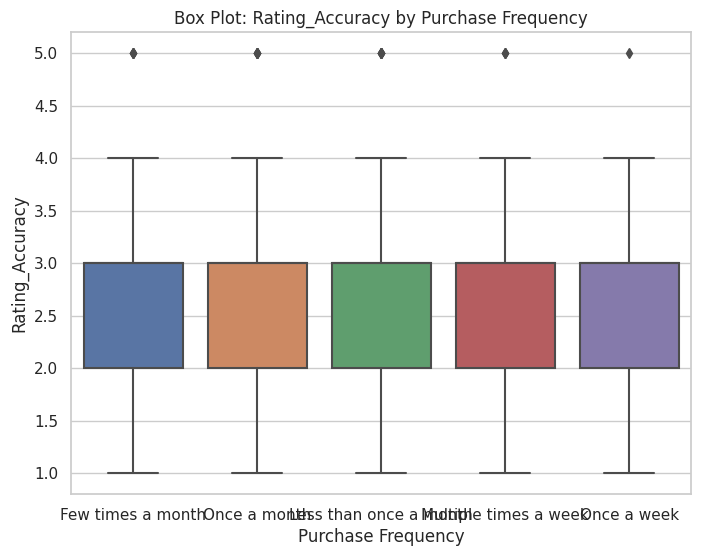

In [ ]:
# Box Plot: Rating_Accuracy by Purchase Frequency
plt.figure(figsize=(8, 6))
sns.boxplot(x='Purchase_Frequency', y='Rating_Accuracy ', data=df)
plt.title("Box Plot: Rating_Accuracy by Purchase Frequency")
plt.xlabel("Purchase Frequency")
plt.ylabel("Rating_Accuracy")
plt.show()

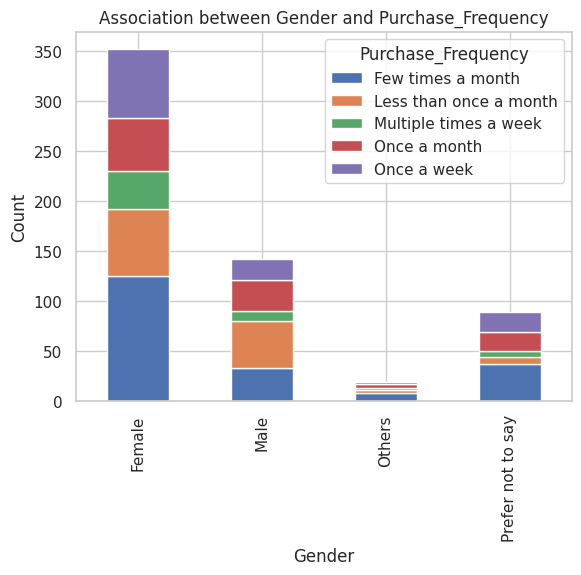

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Gender'], df['Purchase_Frequency'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Present the test results and plot
# ...

# Stacked bar plot
contingency_table.plot(kind='bar', stacked=True)
plt.title('Association between Gender and Purchase_Frequency')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Purchase_Frequency')
plt.show()